In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/static/public/109/data.csv')
wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
sample = pd.get_dummies(wine, columns=["class"])

In [4]:
sample.groupby(["class_1", "class_2", "class_3"]).mean()

Alcohol  Malicacid       Ash  Alcalinity_of_ash  \
class_1 class_2 class_3                                                      
0       0       1        13.153750   3.333750  2.437083          21.416667   
        1       0        12.278732   1.932676  2.244789          20.238028   
1       0       0        13.744746   2.010678  2.455593          17.037288   

                          Magnesium  Total_phenols  Flavanoids  \
class_1 class_2 class_3                                          
0       0       1         99.312500       1.678750    0.781458   
        1       0         94.549296       2.258873    2.080845   
1       0       0        106.338983       2.840169    2.982373   

                         Nonflavanoid_phenols  Proanthocyanins  \
class_1 class_2 class_3                                          
0       0       1                    0.447500         1.153542   
        1       0                    0.363662         1.630282   
1       0       0                    0.290000         1.899322   

                         Color_intensity       Hue  \
class_1 class_2 class_3                              
0       0       1               7.396250  0.682708   
        1       0               3.086620  1.056282   
1       0       0               5.528305  1.062034   

                         0D280_0D315_of_diluted_wines      Proline  
class_1 class_2 class_3                                             
0       0       1                            1.683542   629.895833  
        1       0                            2.785352   519.507042  
1       0       0                            3.157797  1115.711864

In [5]:
wine = wine[["Magnesium", "Flavanoids", "Nonflavanoid_phenols", "Color_intensity", "Total_phenols", "Proline", "class" ]]

In [6]:
import seaborn as sns

<Axes: xlabel='class', ylabel='Magnesium'>

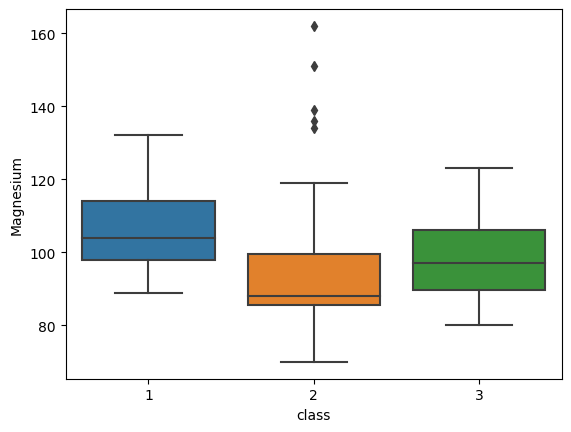

In [7]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[0], data=wine)

<Axes: xlabel='class', ylabel='Flavanoids'>

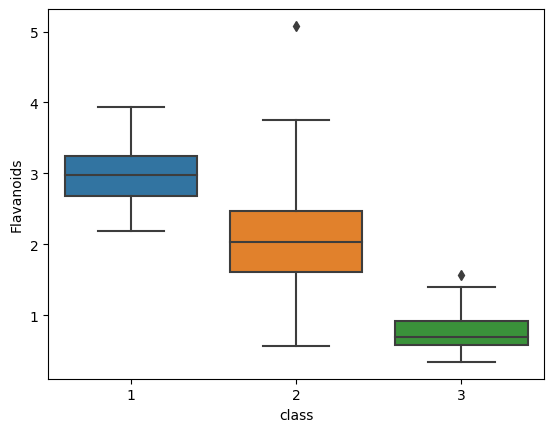

In [8]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[1], data=wine)

<Axes: xlabel='class', ylabel='Nonflavanoid_phenols'>

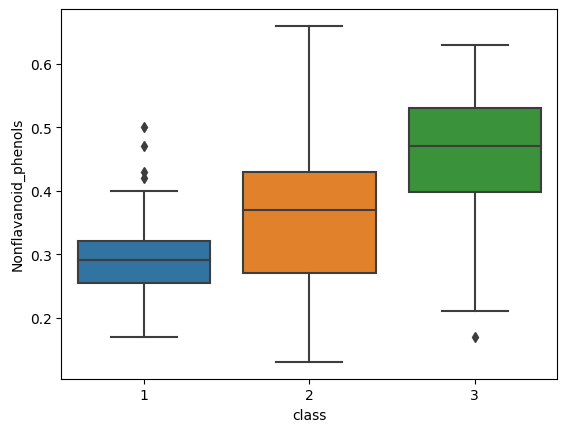

In [9]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[2], data=wine)

<Axes: xlabel='class', ylabel='Color_intensity'>

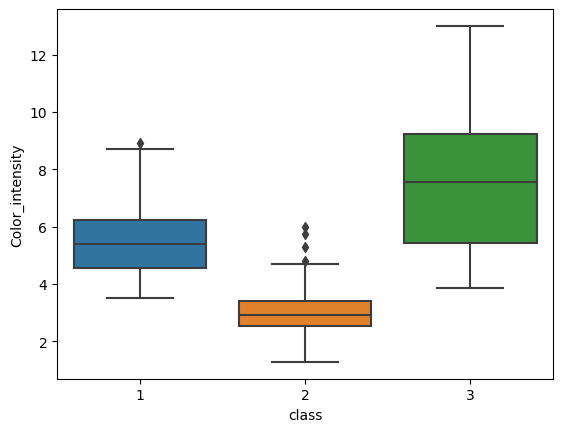

In [10]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[3], data=wine)

<Axes: xlabel='class', ylabel='Total_phenols'>

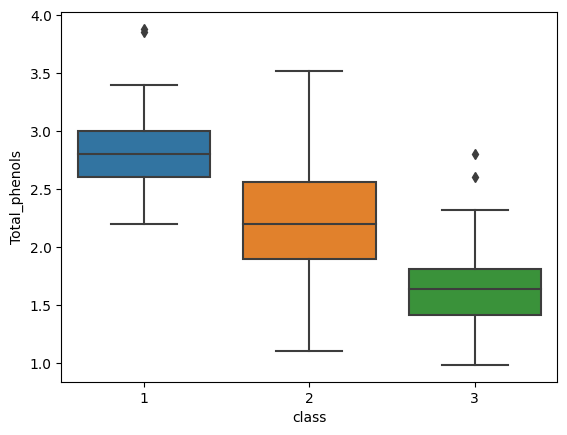

In [11]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[4], data=wine)

<Axes: xlabel='class', ylabel='Proline'>

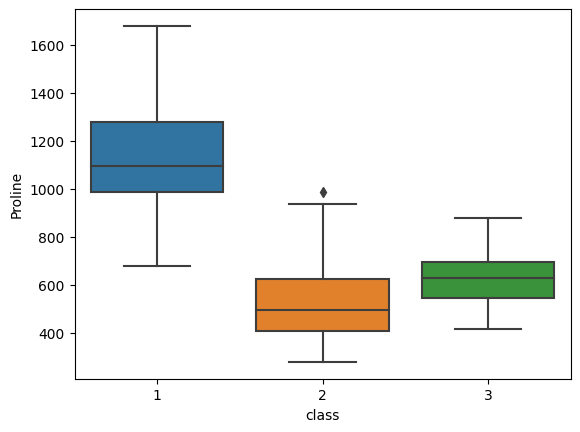

In [12]:
sns.boxplot(x=wine.columns[-1], y=wine.columns[5], data=wine)

In [13]:
df_wine = wine[wine.columns[[1, 3, 4, 5, 6]]]

In [14]:
df_wine.describe()

,Flavanoids,Color_intensity,Total_phenols,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.029270,5.058090,2.295112,746.893258,1.938202
std,0.998859,2.318286,0.625851,314.907474,0.775035
min,0.340000,1.280000,0.980000,278.000000,1.000000
25%,1.205000,3.220000,1.742500,500.500000,1.000000
50%,2.135000,4.690000,2.355000,673.500000,2.000000
75%,2.875000,6.200000,2.800000,985.000000,3.000000
max,5.080000,13.000000,3.880000,1680.000000,3.000000


In [15]:
df_wine.shape

(178, 5)

<Axes: xlabel='Flavanoids', ylabel='Color_intensity'>

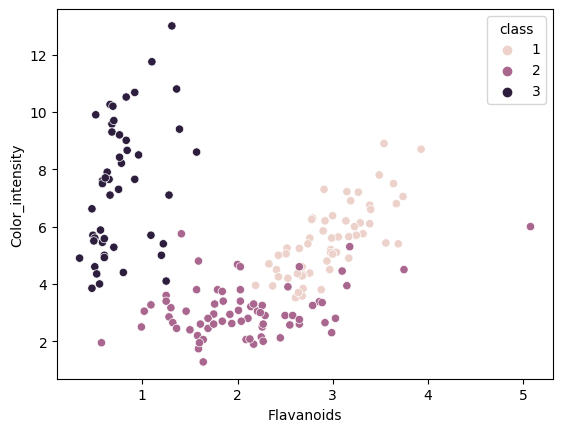

In [16]:
sns.scatterplot(x=df_wine.columns[0], y=df_wine.columns[1], hue=df_wine.columns[4], data=df_wine)

<Axes: xlabel='Flavanoids', ylabel='Total_phenols'>

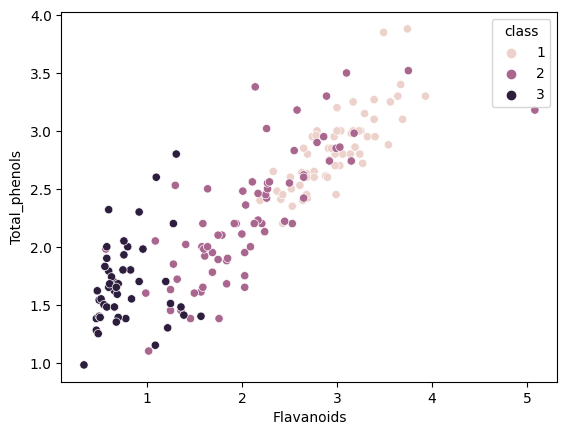

In [17]:
sns.scatterplot(x=df_wine.columns[0], y=df_wine.columns[2], hue=df_wine.columns[4], data=df_wine)

<Axes: xlabel='Color_intensity', ylabel='Total_phenols'>

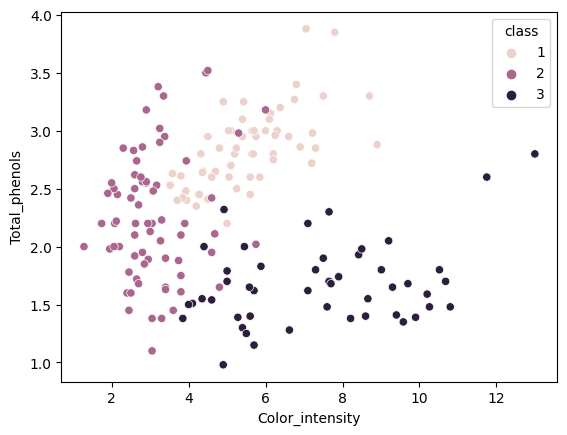

In [18]:
sns.scatterplot(x=df_wine.columns[1], y=df_wine.columns[2], hue=df_wine.columns[4], data=df_wine)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [20]:
param_grid = {"max_depth":[1,2,3,5,7], "n_estimators":[100,200,500],"min_samples_split":[2,3, 5,7] }

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid = param_grid,
                 scoring="accuracy",
                 cv = 5,
                 n_jobs = -1)



In [21]:
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, -1]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify=y)

In [23]:
grid.fit(X=X_train.values,
         y=y_train.values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [24]:
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [25]:
grid_best = grid.best_estimator_

In [26]:
grid_best

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                       random_state=0)

In [29]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, grid_best.predict(X_test)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
